In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
# from sklearn.preprocessing import OneHotEncoder
# from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, auc, roc_curve

In [31]:
key_features = pd.read_csv("Data/key_features.csv")

In [32]:
key_features.head()

,Unnamed: 0.1,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,...,PERSON,LOCATION,DATE,TIME,MONEY,PERCENT,FACILITY,GPE,pos_sentiment,neg_sentiment
0,0,0,3217,/m/014hr,Army of Darkness,1992,21502796.0,81.0,['United States of America'],horror,...,0,0,0,0,0,0,0,0,0.0,0.5
1,1,1,3947,/m/0191n,Blue Velvet,1986,8551228.0,120.0,['United States of America'],thriller,...,1,0,0,0,0,0,0,0,0.0,0.0
2,2,2,4231,/m/01cbx,Buffy the Vampire Slayer,1992,16624456.0,86.0,['United States of America'],action,...,0,0,0,0,0,0,0,0,0.0,0.0
3,3,3,4728,/m/01hq1,Batman Returns,1992,266822354.0,126.0,"['United States of America', 'United Kingdom']",thriller,...,1,0,0,0,0,0,0,0,0.0,0.0
4,4,4,5224,/m/01lsl,Citizen Kane,1941,1585634.0,119.0,['United States of America'],thriller,...,1,0,0,0,0,0,0,0,0.0,0.0


In [33]:
key_features.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Wikipedia_movie_ID', 'Freebase_movie_ID',
       'Movie_name', 'Movie_release_date', 'Movie_box_office_revenue',
       'Movie_runtime', 'Movie_countries', 'Movie_main_genre',
       'Box_office_adjusted', 'Director', 'Audience_imdb_rating',
       'Audience_imdb_count', 'Budget', 'Profit', 'Budget_adjusted',
       'Production Companies', 'Revenu_standardized', 'Profit_standardized',
       'imdb_rating_standardized', 'Success_indicator', 'Actor_name',
       'Freebase_character_ID', 'Famous_actors_count', 'IsFamousStudio',
       'IsFamousDirector', 'Budget_standardized', 'Title_length',
       'Title_characters', 'Nouns', 'Pronouns', 'Adjectives', 'Verbs',
       'Adverbs', 'Prepositions', 'Conjunctions', 'Interjections',
       'ORGANIZATION', 'PERSON', 'LOCATION', 'DATE', 'TIME', 'MONEY',
       'PERCENT', 'FACILITY', 'GPE', 'pos_sentiment', 'neg_sentiment'],
      dtype='object')

In [34]:
key_features_title = key_features[["Movie_name", "Success_indicator","Title_length","Title_characters","Nouns","Pronouns","Adjectives","Verbs","Adverbs", 'Prepositions', 'Conjunctions', 'Interjections',
       'ORGANIZATION', 'PERSON', 'LOCATION', 'DATE', 'TIME', 'MONEY','PERCENT', 'FACILITY', 'GPE', 'pos_sentiment', 'neg_sentiment']]

In [35]:
key_features_title

,Movie_name,Success_indicator,Title_length,Title_characters,Nouns,Pronouns,Adjectives,Verbs,Adverbs,Prepositions,...,PERSON,LOCATION,DATE,TIME,MONEY,PERCENT,FACILITY,GPE,pos_sentiment,neg_sentiment
0,Army of Darkness,0.470781,3,16,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.0,0.500
1,Blue Velvet,0.551225,2,11,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.0,0.000
2,Buffy the Vampire Slayer,-0.453017,4,24,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.0,0.000
3,Batman Returns,1.779560,2,14,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.0,0.000
4,Citizen Kane,0.825333,2,12,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,The Pact,-0.527991,2,8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.000
2626,Moonshine County Express,-0.493803,3,24,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.0,0.000
2627,Trading Mom,-0.708376,2,11,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.000
2628,The Man Behind the Gun,-0.435199,5,22,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.0,0.375


In [36]:
#key_features_title["Success_indicator"] = np.floor(key_features_title["Success_indicator"]/100) +1

In [37]:
#key_features_title["Success_indicator"] = key_features_title["Success_indicator"].astype("int64")

In [38]:
def normalize(x):
    return (x-np.mean(x))/np.std(x)

In [39]:
for i in key_features_title.columns:
    if i != "Movie_name":
        if i != "Success_indicator":
            key_features_title[i] = normalize(key_features_title[i])

/tmp/ipykernel_101/908036668.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_features_title[i] = normalize(key_features_title[i])


In [40]:
key_features_title["neg_sentiment"]

0       1.826629
1      -0.378345
2      -0.378345
3      -0.378345
4      -0.378345
          ...   
2625   -0.378345
2626   -0.378345
2627   -0.378345
2628    1.275385
2629   -0.378345
Name: neg_sentiment, Length: 2630, dtype: float64

In [41]:
# Load the data
X = key_features_title[["Title_length","Title_characters","Nouns","Pronouns","Adjectives","Verbs","Adverbs", 'Prepositions', 'Conjunctions',
       'ORGANIZATION', 'PERSON', 'pos_sentiment', 'neg_sentiment']]

y = key_features_title['Success_indicator']

In [42]:
from sklearn.ensemble import RandomForestClassifier

number_trees = [i for i in range(1,20)]
precision_scores = []
recalls_scores = []

key_features_title_copy = key_features_title.copy(deep=True)

key_features_title_copy["Success_indicator"] = np.floor(key_features_title_copy["Success_indicator"]/100) +1
key_features_title_copy["Success_indicator"] = key_features_title_copy["Success_indicator"].astype("int64")

X = key_features_title_copy[["Title_length","Title_characters","Nouns","Pronouns","Adjectives","Verbs","Adverbs", 'Prepositions', 'Conjunctions',
       'ORGANIZATION', 'PERSON', 'pos_sentiment', 'neg_sentiment']]

y = key_features_title_copy['Success_indicator']


for nt in number_trees:
    clf = RandomForestClassifier(max_depth=20, random_state= 10, n_estimators=nt)
    clf.fit(X, y)
    precision = cross_val_score(clf, X, y, cv=100, scoring="precision")
    precision_scores.append(precision.mean())
    recall = cross_val_score(clf, X, y, cv=100, scoring="recall")
    recalls_scores.append(recall.mean())

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(number_trees, precision_scores, label="Precision")
ax.plot(number_trees, recalls_scores, label="Recall")

ax.set_ylabel("Score value")
ax.set_xlabel("Number of trees")
ax.legend()

In [173]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Load the diabetes dataset
X = key_features_title[["Title_length","Title_characters","Nouns","Pronouns","Adjectives","Verbs","Adverbs", 'Prepositions', 'Conjunctions',
       'ORGANIZATION', 'PERSON', 'pos_sentiment', 'neg_sentiment']]

y = key_features_title['Success_indicator']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [16]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150,200,300,400,500], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30], 
    'max_leaf_nodes': [3, 6, 9, 12, 15, 18], 
}

random_search = RandomizedSearchCV(RandomForestRegressor(), 
                                   param_grid) 
random_search.fit(X_train, y_train) 
print(random_search.best_estimator_)

RandomForestRegressor(max_depth=18, max_features='log2', max_leaf_nodes=18,
                      n_estimators=150)


In [174]:
rf_regressor_2 = RandomForestRegressor(max_depth=24, max_features='log2', max_leaf_nodes=15, n_estimators=300)
rf_regressor_2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor_2.predict(X_test)

# Evaluate the model by calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5749567823440975


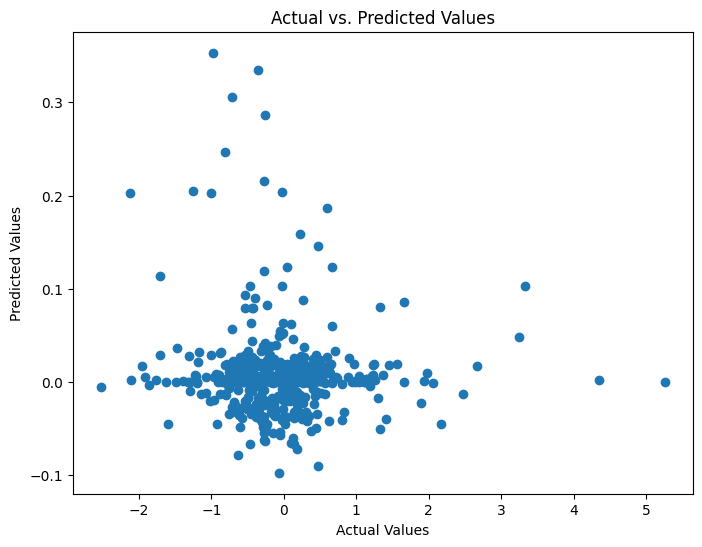

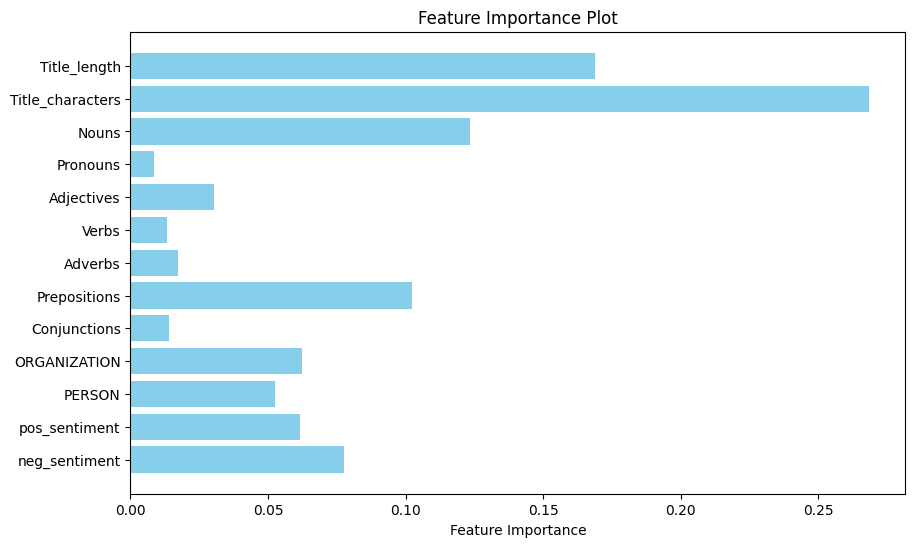

In [175]:
# Scatter Plot for Predicted vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


# Feature Importance Plot
feature_importance = rf_regressor_2.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.gca().invert_yaxis()
plt.show()

([<matplotlib.patches.Wedge at 0x7f38fc5f0d50>,
 [Text(0.9696567528977984, 0.5193898165729649, 'Title_length'),
  Text(-0.21165026151670507, 1.0794462315464863, 'Title_characters'),
  Text(-1.0691907050433807, 0.25851738094147275, 'Nouns'),
  Text(-1.0881582571054738, -0.1609708280812953, 'Pronouns'),
  Text(-1.0630371069833455, -0.2827580399855662, 'Adjectives'),
  Text(-1.018681283301546, -0.41507643037290787, 'Verbs'),
  Text(-0.9778326570553084, -0.5038286363399325, 'Adverbs'),
  Text(-0.7472872475523603, -0.8071937621448877, 'Prepositions'),
  Text(-0.4368338597233184, -1.0095425592808005, 'Conjunctions'),
  Text(-0.20459983796636516, -1.0808047493900725, 'ORGANIZATION'),
  Text(0.16148523771159928, -1.0880820364298036, 'PERSON'),
  Text(0.5075974717197062, -0.9758815536240872, 'pos_sentiment'),
  Text(0.8506437001828594, -0.6974276273128373, 'neg_sentiment'),
  Text(1.0424588847734655, -0.35111176789857496, 'Movie_main_genre'),
  Text(1.0951144412076006, -0.10355848907050018, 'Mo

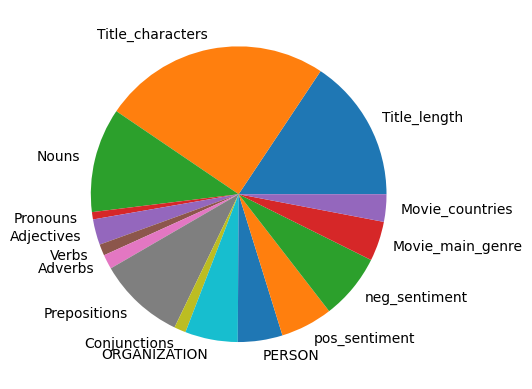

In [176]:
features_imp = pd.DataFrame(feature_importance,feature_names)
features_imp

df = pd.concat(objs=[features_imp,genre_country],axis=0)
dfT = df.T

labels = df.index.values
values = dfT.values[0]*100

fig, ax = plt.subplots()
ax.pie(values, labels=labels)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import string
import requests
import matplotlib.pyplot as plt

In [ ]:
ratings_imdb = pd.read_csv('Data/imdb_movies_post2010.csv',sep=";", on_bad_lines='skip')

In [ ]:
ratings_imdb = ratings_imdb[ratings_imdb.orig_lang == ' English']
ratings_imdb['date'] = pd.to_datetime(ratings_imdb['date'])
ratings_imdb['date'] = ratings_imdb['date'].dt.year
ratings_imdb = ratings_imdb[ratings_imdb.date > 2012]
ratings_imdb.dropna(subset=['revenue',"score"],inplace=True)

ratings_imdb.columns

In [ ]:
ratings_imdb['revenue'] = ratings_imdb['revenue'].astype('float64')
ratings_imdb['revenue'] = np.floor(ratings_imdb['revenue'])
ratings_imdb = ratings_imdb[ratings_imdb['revenue']>0]
ratings_imdb = ratings_imdb[ratings_imdb['score']>0]

In [ ]:
ratings_imdb['imdb_rating_standardized'] = (ratings_imdb['score']-ratings_imdb['score'].mean())/ ratings_imdb['score'].std()
ratings_imdb['Revenu_standardized'] = (ratings_imdb['revenue']-ratings_imdb['revenue'].mean())/ ratings_imdb['revenue'].std()

In [ ]:
# Create an indicator for success, based on ratings and box office revenues
ratings_imdb["Success_indicator"]= (ratings_imdb['imdb_rating_standardized'] + ratings_imdb['Revenu_standardized'])/2
ratings_imdb.head()

In [ ]:
ratings_imdb = ratings_imdb[["Title", "date", "Success_indicator"]]
ratings_imdb.rename(columns={"Title": "Movie_name", "date": "Movie_release_date"}, inplace=True)

In [ ]:
ratings_imdb.to_csv("Data/success_data_after_2012.csv")

In [166]:
test_movies_after_2012 = pd.read_csv("Data/key_features_after_2012.csv")

for i in test_movies_after_2012.columns:
    if i != "Movie_name":
        if i != "Success_indicator":
            test_movies_after_2012[i] = normalize(test_movies_after_2012[i])

X_test = test_movies_after_2012[["Title_length","Title_characters","Nouns","Pronouns","Adjectives","Verbs","Adverbs", 'Prepositions', 'Conjunctions', 
                                 'ORGANIZATION', 'PERSON', 'pos_sentiment', 'neg_sentiment']]

y_test = test_movies_after_2012['Success_indicator']

# Split the dataset into training and testing sets


In [167]:
# Make predictions on the test data
y_pred = rf_regressor_2.predict(X_test)

# Evaluate the model by calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5601539051532998


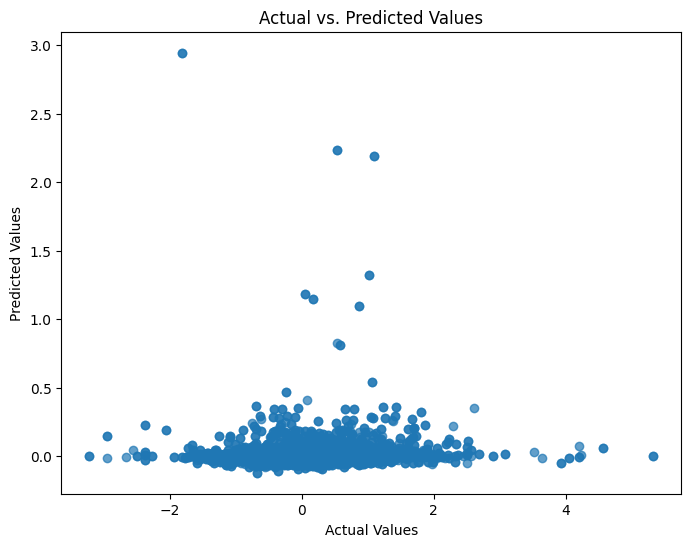

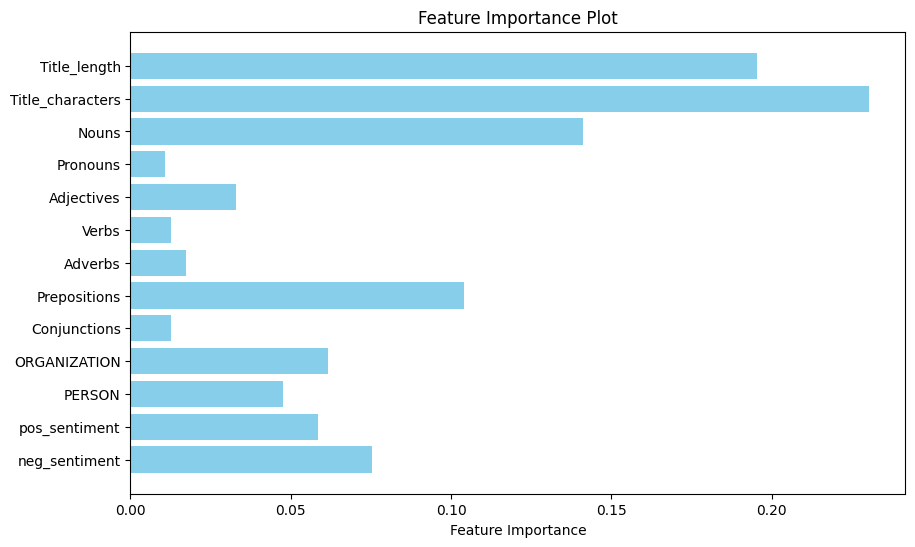

In [168]:
# Scatter Plot for Predicted vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


# Feature Importance Plot
feature_importance = rf_regressor_2.feature_importances_
feature_names = X_test.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.gca().invert_yaxis()
plt.show()

([<matplotlib.patches.Wedge at 0x7f38fc44e990>,
 [Text(0.9270546683223411, 0.5920892178901374, 'Title_length'),
  Text(-0.25717739993114375, 1.069513807748482, 'Title_characters'),
  Text(-1.0647821591339743, 0.2761140228057818, 'Nouns'),
  Text(-1.0804052582815271, -0.20669900308813074, 'Pronouns'),
  Text(-1.0455020127208527, -0.34194376934906456, 'Adjectives'),
  Text(-0.9912754307680489, -0.47683647129348167, 'Verbs'),
  Text(-0.9458664222390002, -0.5615484941488078, 'Adverbs'),
  Text(-0.6933273006211533, -0.8539890246445706, 'Prepositions'),
  Text(-0.36939210628668234, -1.0361223247344342, 'Conjunctions'),
  Text(-0.13871694021655245, -1.0912184064141137, 'ORGANIZATION'),
  Text(0.20938857567628563, -1.0798872276197438, 'PERSON'),
  Text(0.5279265946047093, -0.9650354971238495, 'pos_sentiment'),
  Text(0.8549246540709481, -0.6921732701149834, 'neg_sentiment'),
  Text(1.042458701914724, -0.3511123108099012, 'Movie_main_genre'),
  Text(1.0951143854563303, -0.10355907862956412, 'Mo

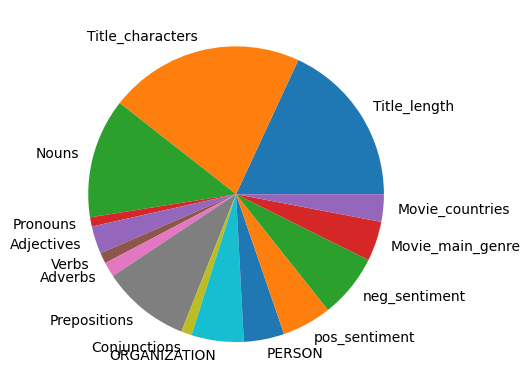

In [172]:
features_imp = pd.DataFrame(feature_importance,feature_names)
features_imp

df = pd.concat(objs=[features_imp,genre_country],axis=0)
dfT = df.T

labels = df.index.values
values = dfT.values[0]*100

fig, ax = plt.subplots()
ax.pie(values, labels=labels)

# Avec les autres features

In [49]:
key_features.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Wikipedia_movie_ID', 'Freebase_movie_ID',
       'Movie_name', 'Movie_release_date', 'Movie_box_office_revenue',
       'Movie_runtime', 'Movie_countries', 'Movie_main_genre',
       'Box_office_adjusted', 'Director', 'Audience_imdb_rating',
       'Audience_imdb_count', 'Budget', 'Profit', 'Budget_adjusted',
       'Production Companies', 'Revenu_standardized', 'Profit_standardized',
       'imdb_rating_standardized', 'Success_indicator', 'Actor_name',
       'Freebase_character_ID', 'Famous_actors_count', 'IsFamousStudio',
       'IsFamousDirector', 'Budget_standardized', 'Title_length',
       'Title_characters', 'Nouns', 'Pronouns', 'Adjectives', 'Verbs',
       'Adverbs', 'Prepositions', 'Conjunctions', 'Interjections',
       'ORGANIZATION', 'PERSON', 'LOCATION', 'DATE', 'TIME', 'MONEY',
       'PERCENT', 'FACILITY', 'GPE', 'pos_sentiment', 'neg_sentiment'],
      dtype='object')

In [184]:
key_features_all = key_features[["Success_indicator", "Movie_release_date", "Movie_runtime", "Movie_countries", "Movie_main_genre", "Famous_actors_count", "IsFamousStudio", 
                                 "IsFamousDirector", "Title_length", "Title_characters", "Nouns","Pronouns", "Adjectives", "Verbs", "Adverbs", 'Prepositions', 'Conjunctions',
                                 'ORGANIZATION', 'PERSON', 'pos_sentiment', 'neg_sentiment']]

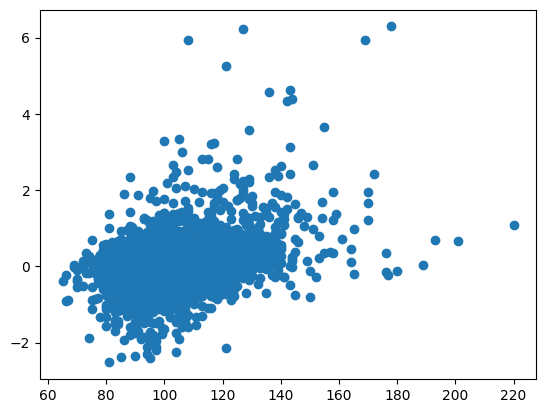

In [185]:
plt.scatter(key_features_all["Movie_runtime"], key_features_all["Success_indicator"])

In [79]:
for i in key_features_all.columns:
    if i != "Movie_name":
        if i != "Success_indicator":
            if i != "Movie_countries":
                if i != "Movie_main_genre":
                    key_features_all[i] = normalize(key_features_all[i])

/tmp/ipykernel_101/3042675099.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_features_all[i] = normalize(key_features_all[i])


In [80]:
X = key_features_all[["Movie_release_date", "Movie_runtime", "Famous_actors_count", "IsFamousStudio", "Movie_countries", "Movie_main_genre",
                      "IsFamousDirector", "Title_length", "Title_characters", "Nouns","Pronouns", "Adjectives", "Verbs", "Adverbs", 'Prepositions', 'Conjunctions', 
                      'ORGANIZATION', 'PERSON', 'pos_sentiment', 'neg_sentiment']]

X = pd.get_dummies(X, columns= ["Movie_countries","Movie_main_genre"])

y = key_features_all['Success_indicator']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [83]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150,200,300,400,500,1000], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30], 
    'max_leaf_nodes': [3, 6, 9, 12, 15, 18], 
}

random_search = RandomizedSearchCV(RandomForestRegressor(), 
                                   param_grid) 
random_search.fit(X_train, y_train) 
print(random_search.best_estimator_)

RandomForestRegressor(max_depth=9, max_features=None, max_leaf_nodes=12,
                      n_estimators=500)


In [84]:
rf_regressor_all = RandomForestRegressor(max_depth=9, max_features=None, max_leaf_nodes=12, n_estimators=500)
rf_regressor_all.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor_all.predict(X_test)

# Evaluate the model by calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.4507215004066462


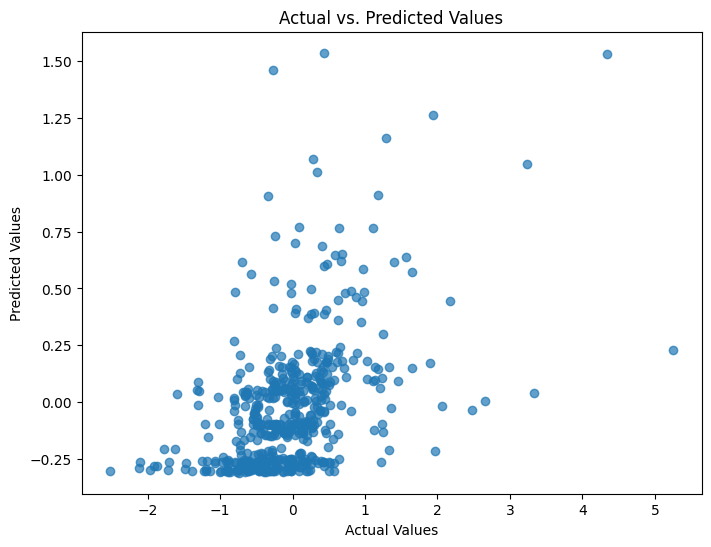

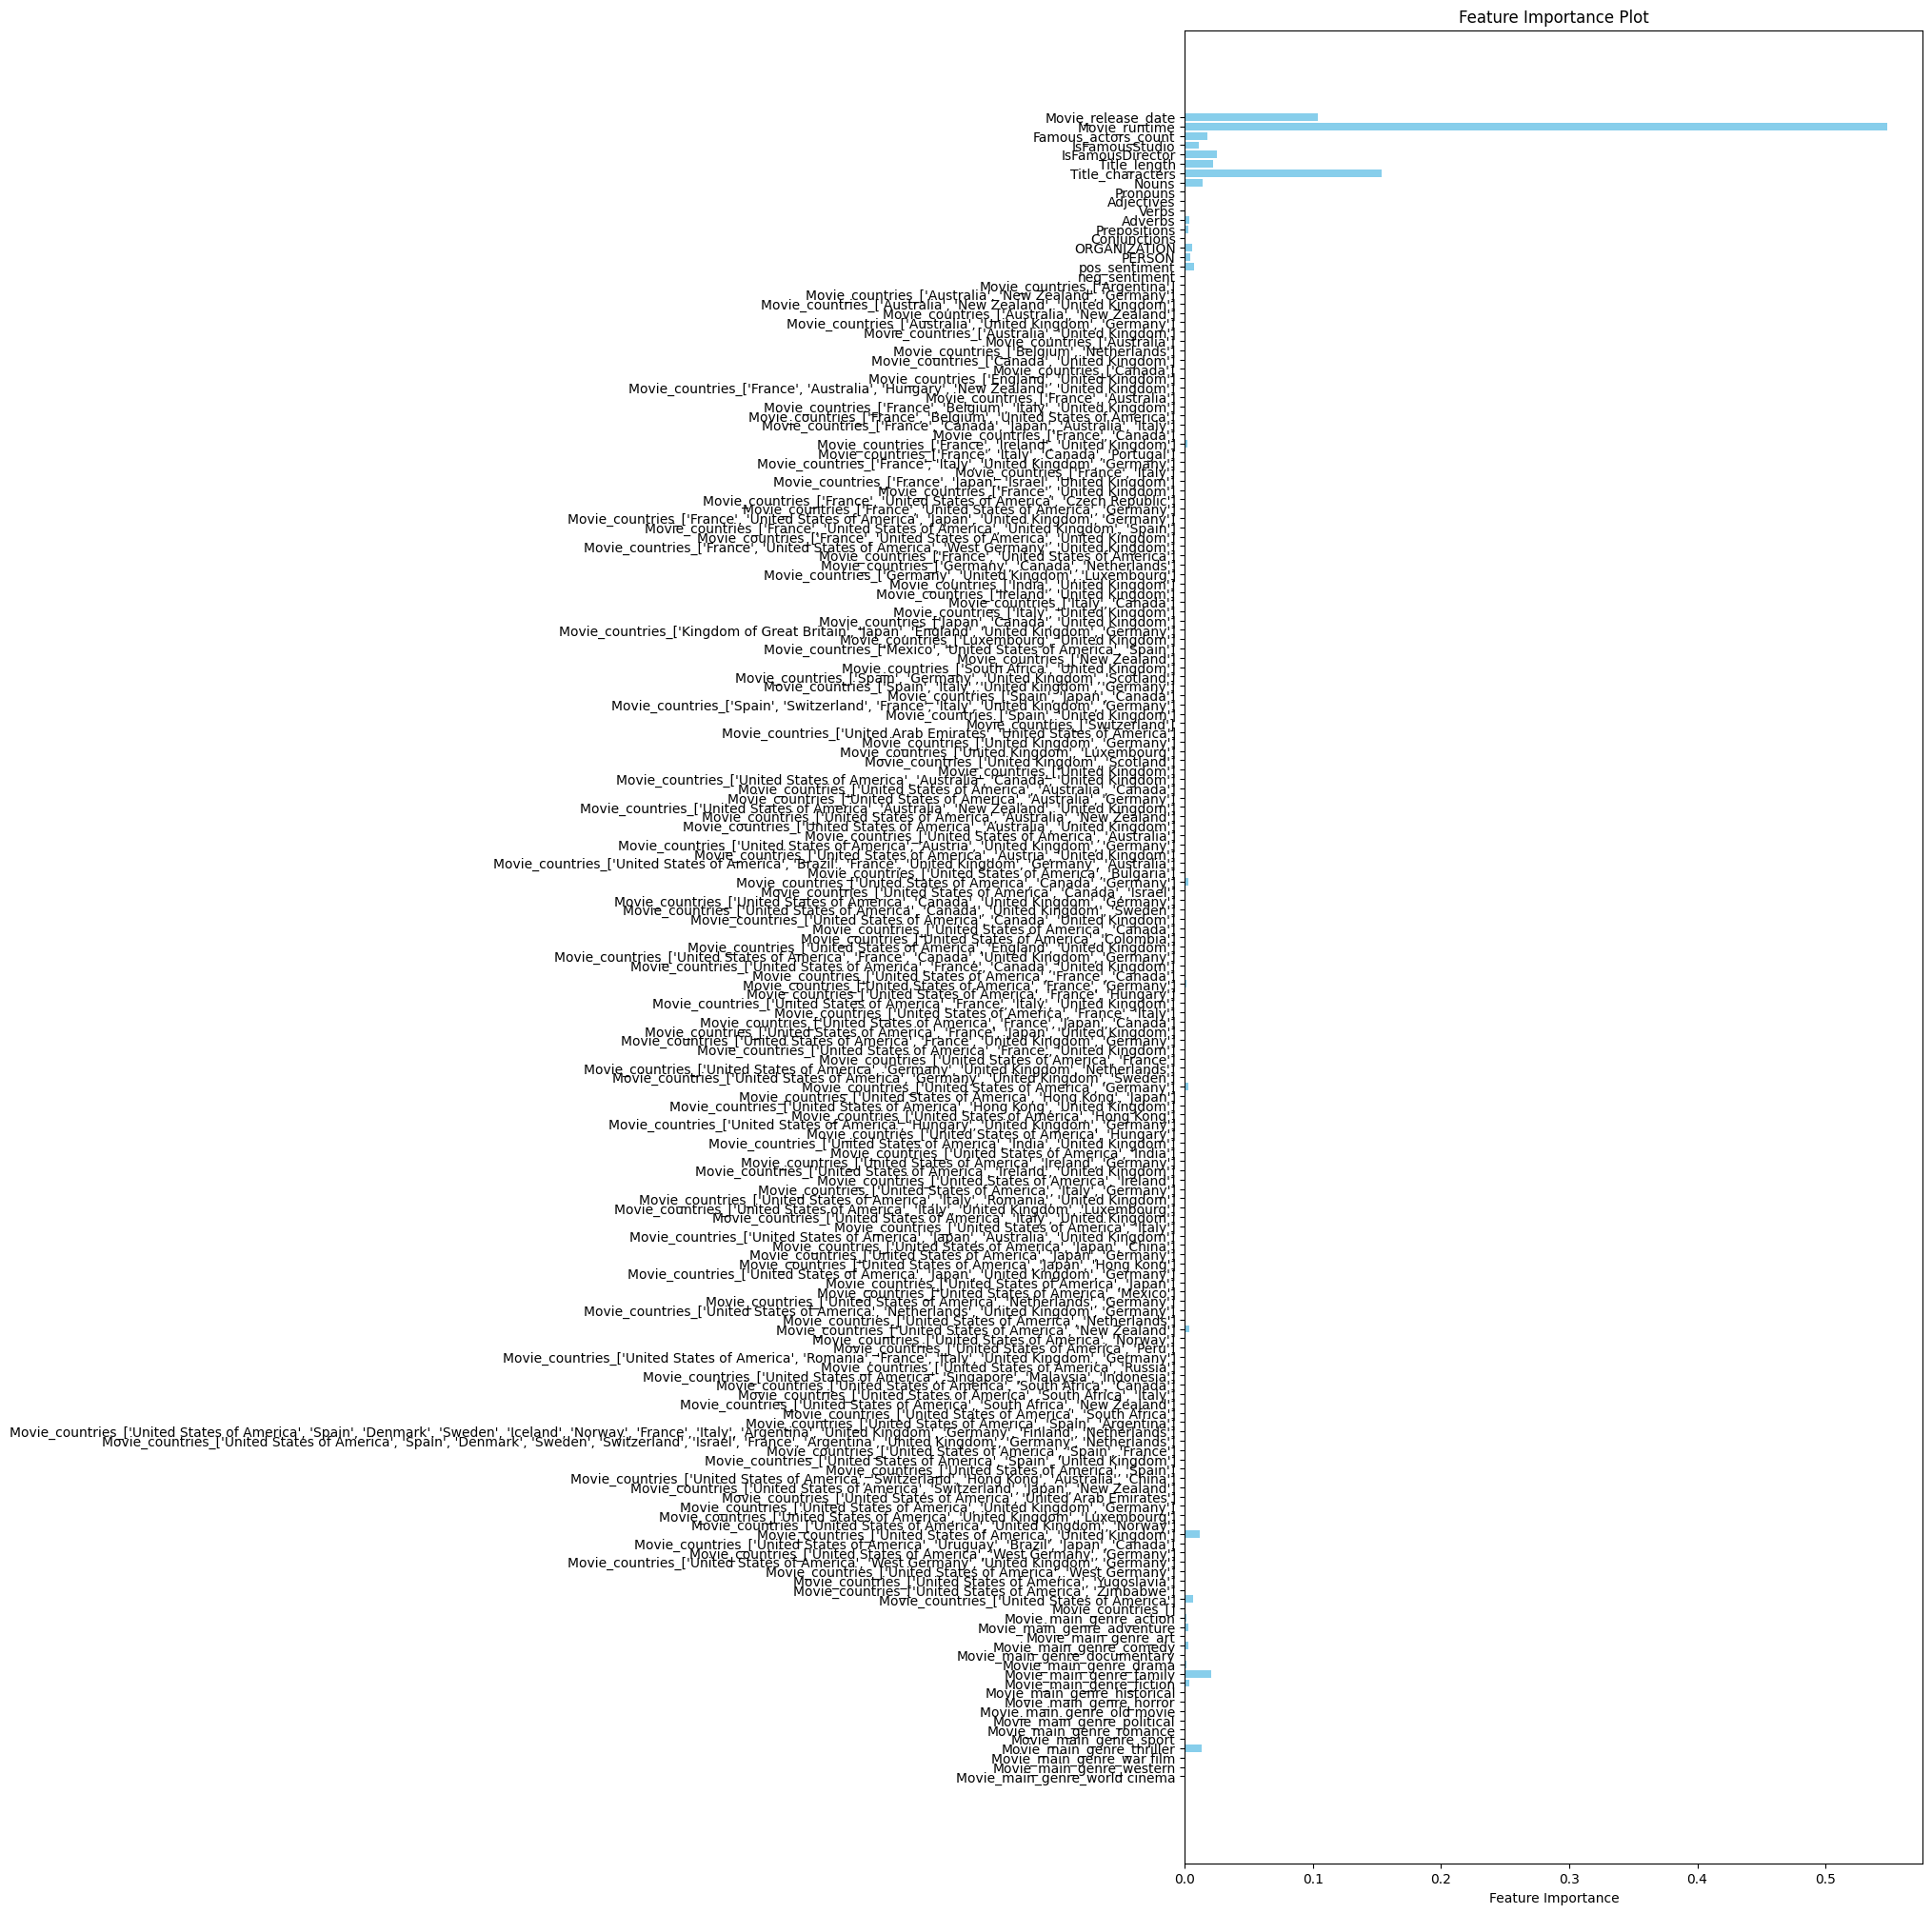

In [100]:
# Scatter Plot for Predicted vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


# Feature Importance Plot
feature_importance = rf_regressor_all.feature_importances_
feature_names = X_test.columns

plt.figure(figsize=(10, 25))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.gca().invert_yaxis()
plt.show()

In [133]:
features_imp = pd.DataFrame(feature_importance,feature_names)
features_imp

,0
Movie_release_date,0.103491
Movie_runtime,0.548588
Famous_actors_count,0.017899
IsFamousStudio,0.011199
IsFamousDirector,0.024715
...,...
Movie_main_genre_sport,0.000555
Movie_main_genre_thriller,0.012982
Movie_main_genre_war film,0.000000
Movie_main_genre_western,0.000066


In [134]:
importance_genre = np.sum(features_imp.filter(like='main_genre', axis=0))
importance_country = np.sum(features_imp.filter(like='countries', axis=0))

([<matplotlib.patches.Wedge at 0x7f38fe50e790>,
 [Text(1.0423711129716544, 0.3513722567907637, 'Movie_release_date'),
  Text(-0.7913087987864467, 0.7640879432127894, 'Movie_runtime'),
  Text(-0.5833966745963943, -0.9325493660229838, 'Famous_actors_count'),
  Text(-0.4958323779000649, -0.9819115301420833, 'IsFamousStudio'),
  Text(-0.38212816723021154, -1.0314931234910292, 'IsFamousDirector'),
  Text(-0.22651547329440314, -1.0764249812960551, 'Title_length'),
  Text(0.3728616429048237, -1.034878831192481, 'Title_characters'),
  Text(0.8428076646825428, -0.7068771041364679, 'Nouns'),
  Text(0.8728052390718468, -0.6694856343856352, 'Pronouns'),
  Text(0.8731558306198005, -0.6690283218628688, 'Adjectives'),
  Text(0.8736363234278021, -0.668400758817308, 'Verbs'),
  Text(0.8816191136462399, -0.6578356469921789, 'Adverbs'),
  Text(0.894435923545164, -0.6403002254192246, 'Prepositions'),
  Text(0.8995699710222114, -0.6330670321815044, 'Conjunctions'),
  Text(0.9115521913970429, -0.61568872196

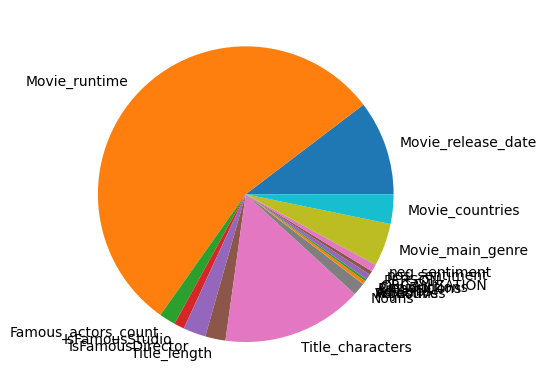

In [159]:
features_imp = features_imp.loc["Movie_release_date":'neg_sentiment']

genre_country = pd.DataFrame(np.array([importance_genre,importance_country]),np.array(["Movie_main_genre","Movie_countries"]))

df = pd.concat(objs=[features_imp,genre_country],axis=0)
dfT = df.T

labels = df.index.values
values = dfT.values[0]*100

fig, ax = plt.subplots()
ax.pie(dfT.values[0]*100, labels=df.index.values)